# Supervised Learning
## Regression Algorithms
### Linear Regression 

In [1]:
import pandas as pd
import numpy as np

In [2]:
data_df = pd.read_csv("Advertising.csv", index_col=0)

In [3]:
data_df.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


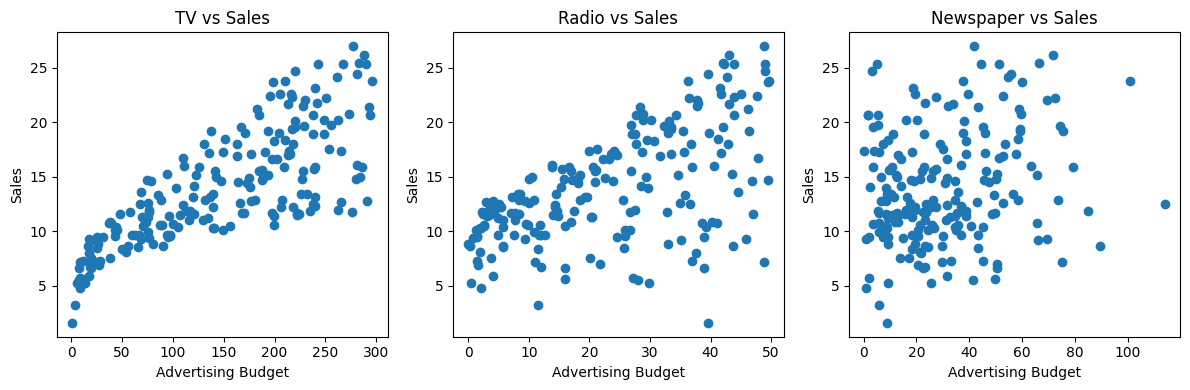

In [10]:
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3, figsize=(12, 4))

axes[0].scatter(data_df['TV'], data_df['sales'])
axes[0].set_title('TV vs Sales')

axes[1].scatter(data_df['radio'], data_df['sales'])
axes[1].set_title('Radio vs Sales')

axes[2].scatter(data_df['newspaper'], data_df['sales'])
axes[2].set_title('Newspaper vs Sales')

for ax in axes:
    ax.set_xlabel('Advertising Budget')
    ax.set_ylabel('Sales')

plt.tight_layout()
plt.show()



In [4]:
data_df.corr()


,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


In [11]:
X = data_df.TV.to_numpy()
Y = data_df.sales.to_numpy()


In [13]:
x_mean = X.mean()
y_mean = Y.mean()

beta_1 = np.sum((-x_mean)*(Y-y_mean))/np.sum(np.power((X - x_mean),2))

In [14]:
beta_0 = y_mean - (beta_1 * x_mean)

In [15]:
print(f"y = {beta_0:.3f} + {beta_1:.3f}x")

y = 14.022 + 0.000x


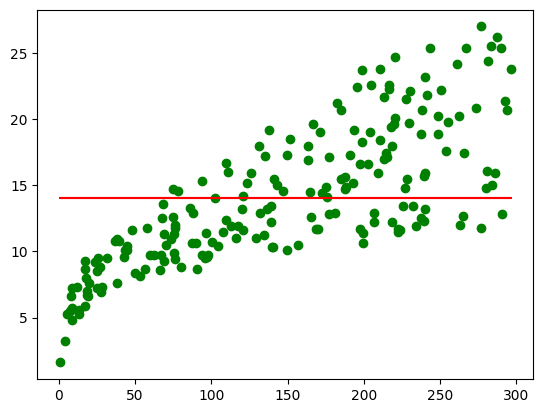

In [18]:
plt.scatter(X,Y, color = "green")
plt.plot(X, beta_0+(beta_1*X), color = "red")

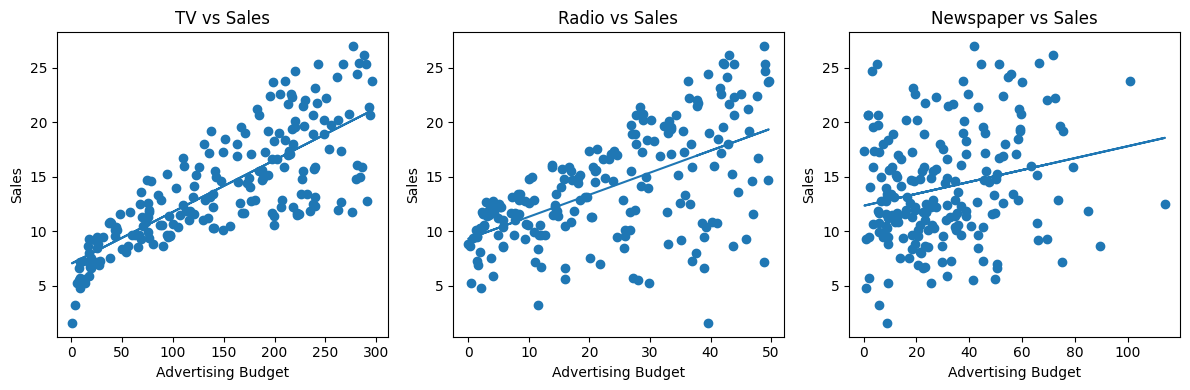

In [25]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

# ---------- TV vs Sales ----------
x = data_df['TV']
y = data_df['sales']
b1, b0 = np.polyfit(x, y, 1)

axes[0].scatter(x, y)
axes[0].plot(x, b1*x + b0)
axes[0].set_title('TV vs Sales')

# ---------- Radio vs Sales ----------
x = data_df['radio']
b1, b0 = np.polyfit(x, y, 1)

axes[1].scatter(x, y)
axes[1].plot(x, b1*x + b0)
axes[1].set_title('Radio vs Sales')

# ---------- Newspaper vs Sales ----------
x = data_df['newspaper']
b1, b0 = np.polyfit(x, y, 1)

axes[2].scatter(x, y)
axes[2].plot(x, b1*x + b0)
axes[2].set_title('Newspaper vs Sales')

# Labels
for ax in axes:
    ax.set_xlabel('Advertising Budget')
    ax.set_ylabel('Sales')

plt.tight_layout()
plt.show()

# Sklearn Implementation 

In [19]:
from sklearn.linear_model import LinearRegression


In [20]:
linear_reg = LinearRegression()


In [22]:
linear_reg.fit([X], [Y])

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [23]:
linear_reg.fit(X.reshape(-1,1), Y.reshape(-1,1))

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [24]:
linear_reg.coef_

array([[0.04753664]])

In [28]:
linear_reg

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [29]:
from sklearn.model_selection import train_test_split

In [35]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state = 909)

In [39]:
# ===== IMPORT LIBRARIES =====
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# ===== LOAD DATA =====
data_df = pd.read_csv("Advertising.csv", index_col=0)
data_df.columns = data_df.columns.str.lower().str.strip()

# ===== FEATURES & TARGET =====
X = data_df[['tv']]          # must be 2D
y = data_df['sales']         # 1D

# ===== TRAIN TEST SPLIT =====
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ===== LINEAR REGRESSION MODEL =====
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)



,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [38]:
lin_reg.coef_

array([0.04652973])

In [44]:
y_pred = lin_reg.predict(X_test)

In [40]:
from sklearn.metrics import max_error, mean_absolute_error, mean_squared_error

In [45]:
max_error(y_test, y_pred)

7.329861234097876

# R2_Score

In [46]:
from sklearn.metrics import r2_score

r2_score(y_test, y_pred)

0.6766954295627076

In [47]:
R = data_df[["radio"]]
y = data_df["sales"]

In [48]:
R_train, R_test, y_train, y_test = train_test_split(
    R, y, test_size=0.2, random_state=909
)

In [49]:
lin_reg = LinearRegression()
lin_reg.fit(R_train, y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [50]:
y_pred = lin_reg.predict(R_test)

In [54]:
r2 = r2_score(y_test, y_pred)
print("r2_score =", r2)

r2_score = 0.3451409305611842


# Newspaper and Sales

In [58]:
N = data_df[['newspaper']]  
y = data_df['sales']


N_train, N_test, y_train, y_test = train_test_split(
    N, y, test_size=0.2, random_state=909
)

lin_reg = LinearRegression()
lin_reg.fit(N_train, y_train)


y_pred = lin_reg.predict(N_test)

r2 = r2_score(y_test, y_pred)
print("r2_score (Newspaper vs Sales):", r2)

r2_score (Newspaper vs Sales): 0.0724440713586979


In [59]:
data_df


,tv,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9
...,...,...,...,...
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5


In [60]:
# ===== IMPORT LIBRARIES =====
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# ===== LOAD DATA =====
data_df = pd.read_csv("Advertising.csv", index_col=0)
data_df.columns = data_df.columns.str.lower().str.strip()

# ===== TARGET VARIABLE =====
y = data_df['sales']

# ===== FEATURES TO TEST =====
features = ['tv', 'radio', 'newspaper']

# ===== LOOP THROUGH FEATURES =====
for feature in features:
    X = data_df[[feature]]   # must be 2D
    
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )
    
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    
    print(f"R² score ({feature.capitalize()} vs Sales): {r2:.3f}")


R² score (Tv vs Sales): 0.677
R² score (Radio vs Sales): 0.263
R² score (Newspaper vs Sales): 0.030
